In [47]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv("insurance.csv")

In [2]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

df.duplicated().sum()

0

In [8]:
df["sex"].unique()


array(['female', 'male'], dtype=object)

In [9]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

C:\Users\o876\Internet G\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: 'AxesSubplot' object has no attribute 'unique'

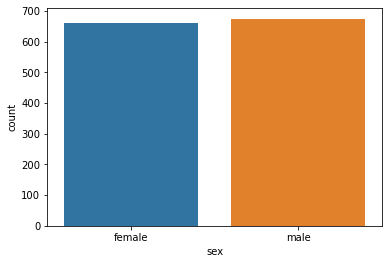

In [10]:
sns.countplot(df["sex"]).unique

In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [14]:
df[df["sex"]=="male"].head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
8,37,male,29.830,2,no,northeast,6406.41070


<AxesSubplot:>

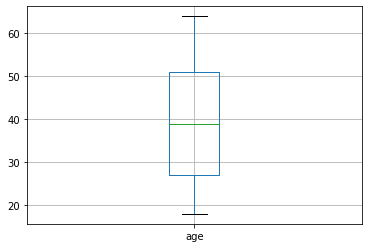

In [18]:
df[["age"]].boxplot()

In [19]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


<AxesSubplot:>

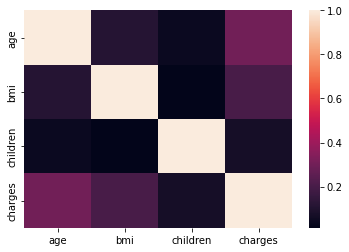

In [20]:
sns.heatmap(df.corr())

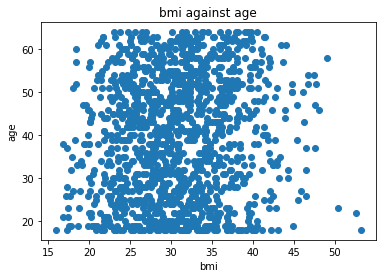

In [31]:
#Linear Regression
body_mi=df["bmi"].to_numpy()
age_np=df["age"].to_numpy()

import matplotlib.pyplot as plt

plt.scatter(body_mi,age_np)
plt.xlabel("bmi")
plt.ylabel("age")
plt.title("bmi against age")
plt.show()

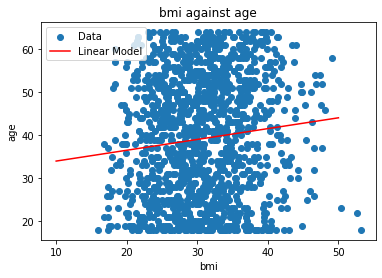

In [42]:
import sklearn
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression().fit(body_mi.reshape((-1, 1)),age_np)

redteam_inputs = np.linspace(10, 50)
redteam_predictions = linear_model.predict(redteam_inputs.reshape((-1, 1)))

plt.scatter(body_mi,age_np,label='Data')
plt.plot(redteam_inputs, redteam_predictions, label='Linear Model', color='red')
plt.xlabel("bmi")
plt.ylabel("age")
plt.title("bmi against age")
plt.legend()
plt.show()



In [44]:
from sklearn.metrics import mean_absolute_error as abc

print('Mean Absolute Error =',abc(linear_model.predict(body_mi.reshape((-1, 1))),age_np))

Mean Absolute Error = 12.146406924043768


In [45]:
from sklearn.metrics import mean_squared_error as abc

print('Mean Squared Error =',abc(linear_model.predict(body_mi.reshape((-1, 1))),age_np))

Mean Squared Error = 194.73927338096502


In [46]:
print('Mean Squared Error =',abc(linear_model.predict(body_mi.reshape((-1, 1))),age_np, squared=False))

Mean Squared Error = 13.95490141065013
